                                                                                        Patricia Grau Francitorra
# Exploratory article analysis
## Objective
1. Get data from Wikipedia - analyse html format
2. UD tagging
3. Treebanks
4. Comparison
  - Problem: lining up data with same information.
    - Some files have a line for explanation: see first line of french article.
    - Info in two sentences contained in one; see French article.
    - Some articles do not even have the same sections.

In [1]:
import re
import requests
import json
import tempfile
from bs4 import BeautifulSoup
# format is shift alt f (in VSC)

### 1. Get data from Wikipedia

In [24]:
# Neat idea, but doesn't work with disambiguating urls, such as Jupiter
list_of_langs = ['en','sv' , 'ca', 'es', 'fr']
list_of_urls = [f'https://{lang}.wikipedia.org/wiki/Jupiter' for lang in list_of_langs]
list_of_urls

['https://en.wikipedia.org/wiki/Jupiter',
 'https://sv.wikipedia.org/wiki/Jupiter',
 'https://ca.wikipedia.org/wiki/Jupiter',
 'https://es.wikipedia.org/wiki/Jupiter',
 'https://fr.wikipedia.org/wiki/Jupiter']

In [3]:
eng_jup_url = 'https://en.wikipedia.org/wiki/Jupiter'
sv_jup_url = 'https://sv.wikipedia.org/wiki/Jupiter'
fr_jup_url = 'https://fr.wikipedia.org/wiki/Jupiter_(planète)' # disambiguation issue
spa_jup_url = 'https://es.wikipedia.org/wiki/Júpiter_(planeta)' # disambiguation issue
ca_jup_url = 'https://ca.wikipedia.org/wiki/Júpiter_(planeta)' # disambiguation issue

In [31]:
with open('jupiter/html_files/jupiter_en.html', 'w') as f:
    f.write(requests.get(url = eng_jup_url).text)
with open('jupiter/html_files/jupiter_spa.html', 'w') as g:
    g.write(requests.get(url = spa_jup_url).text)
with open('jupiter/html_files/jupiter_fr.html', 'w') as g:
    g.write(requests.get(url = fr_jup_url).text)

In [6]:
# r = requests.get(url = eng_jup_url)

# r = requests.get(eng_jup_url)
# data = r.json()
# starters = ['<p>', '</p><p>', '<title>', '<h']
# for alltext in r: #data:
#     texto = alltext.strip('\t')
#     if texto.startswith(tuple(starters)):# ('<p>') or texto.startswith('</p><p>'): # if '<p>' in texto or '</p>' in texto:
#         cleantext = BeautifulSoup(texto, "html.parser").text # when using "lxml" as the parser insead of html.parser, some paragraphs/lines are missing
#         cleantext = re.sub(r'\[\d+\]', '', cleantext) # remove references [digit]
#         cleantext = cleantext.strip()
#         if len(cleantext) != 0:
#             print(cleantext)
#             print()

In [59]:
r = requests.post(url= eng_jup_url)
starters = ['<p>', '</p><p>', '<title>', '<h']
import tempfile

temp = tempfile.TemporaryFile(mode='w+t')

try:
    temp.writelines(r.text)
    
    for alltext in temp:
        print(alltext)
        texto = alltext.strip('\t')
        if texto.startswith(tuple(starters)):# ('<p>') or texto.startswith('</p><p>'): # if '<p>' in texto or '</p>' in texto:
            cleantext = BeautifulSoup(texto, "html.parser").text # when using "lxml" as the parser insead of html.parser, some paragraphs/lines are missing
            cleantext = re.sub(r'\[\d+\]', '', cleantext) # remove references [digit]
            cleantext = cleantext.strip()
            if len(cleantext) != 0:
                print(cleantext)
                print()
finally:
    temp.close()

In [32]:
def print_cleantext(file):
    starters = ['<p>', '</p><p>', '<title>', '<h']
    f = open(file)
    # print(f.readlines())
    for alltext in f.readlines():
        texto = alltext.strip('\t')
        if texto.startswith(tuple(starters)):# ('<p>') or texto.startswith('</p><p>'): # if '<p>' in texto or '</p>' in texto:
            cleantext = BeautifulSoup(texto, "html.parser").text # when using "lxml" as the parser insead of html.parser, some paragraphs/lines are missing
            cleantext = re.sub(r'\[\d+\]', '', cleantext) # remove references [digit]
            cleantext = cleantext.strip()
            if len(cleantext) != 0:
                print(cleantext)
                print()
    f.close()

In [10]:
#print_cleantext('jupiter/html_files/jupiter_en.html')

In [34]:
def save_cleantext(readfile, writefile):
    starters = ['<p>', '</p><p>', '<title>', '<h']
    f = open(readfile)
    with open(writefile, 'w') as g:
        for alltext in f.readlines():
            texto = alltext.strip('\t')
            if texto.startswith(tuple(starters)):
#             if texto.startswith('<p>') or texto.startswith('</p><p>'): # if '<p>' in texto or '</p>' in texto:
                cleantext = BeautifulSoup(texto, "html.parser").text # when using "lxml" as the parser insead of html.parser, some paragraphs/lines are missing
                cleantext = re.sub(r'\[\d+\]', '', cleantext) # remove references [digit]
                cleantext = cleantext.strip()
                cleantext = cleantext.replace(u'\u200b', '')
                if len(cleantext) != 0:
                    g.write(cleantext + '\n')
    f.close()

In [35]:
save_cleantext('jupiter/html_files/jupiter_en.html', 'jupiter/cleantext/clean_jupiter_en.txt')
save_cleantext('jupiter/html_files/jupiter_spa.html', 'jupiter/cleantext/clean_jupiter_spa.txt')
save_cleantext('jupiter/html_files/jupiter_fr.html', 'jupiter/cleantext/clean_jupiter_fr.txt')

#### 1.2 Languages in the Wikipedia

In [18]:
def get_wiki_lang_codes():
    """
    Retrieves the language codes in Wikipedia
    Returns:
      - langugages: a dictionary containing
        the language code as the key and the
        language as the value.
    """
    url_languages = 'https://meta.wikimedia.org/wiki/List_of_Wikipedias'
    with tempfile.TemporaryFile(mode='w+t') as tmp:
        tmp.write(requests.get(url_languages).text)
        tmp.seek(0)
        languages = {}
        n = 0
        l = []
        for i, alltext in enumerate(tmp.readlines()):
            if i < 165 or i > 8484:
                continue
            if alltext.startswith('<td>'):
                texto = alltext.strip('\t')
                cleantext = BeautifulSoup(texto, "html.parser").text # when using "lxml" as the parser insead of html.parser, some paragraphs/lines are missing
#                 cleantext = re.sub(r'\[\d+\]', '', cleantext) # remove references [digit]
#                 cleantext = re.sub('[()]', '', cleantext) # remove parenthesis
                cleantext = cleantext.strip()
                if len(cleantext) != 0:
                    if str(n).endswith('1'):
                        l.append(cleantext.lower())
                    elif str(n).endswith('2'):
                        if l[0] == 'norwegian bokmål':
                            l[0] = 'norwegian bokmaal'
                        elif l[0] == 'northern sami':
                            l[0] = 'north sami'
#                         languages[cleantext] = l[0]
                        languages[l[0]] = cleantext # other way around
                    else:
                        l = []
                    n += 1
    return languages

In [19]:
languages = get_wiki_lang_codes()

In [54]:
# languages

#### 1.3 Wikipedia articles written in the greatest number of languages

In [19]:
r = requests.get('https://en.wikipedia.org/wiki/Wikipedia:Wikipedia_articles_written_in_the_greatest_number_of_languages')
articles = {}
for element in r.text.split('\n'):
    if element.startswith('<p>') or element.startswith('</p>'):
        if len(element.split(' ')) > 1:
            link = element.split(' ')[1][7:-1]
        text = BeautifulSoup(element, "html.parser").text
        if ':' in text:
            name, other = text.split(':')
            for e in other.split(' '):
                if e.isnumeric():
                    articles[name] = (int(e), link)
        else:
            words = text.split(' ')
            name = words[0]
            for e in words:
                if e.isnumeric():
                    articles[name] = (int(e), link)

In [55]:
# dict(sorted(articles.items(), key=lambda item: item[1], reverse = True))

### 2. UD tagging

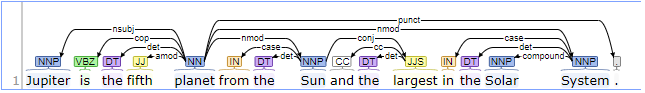
Example of what I want (from corenlp.run) -> in CONLLU format

In [14]:
# using stanza
import stanza
from stanza.utils.conll import CoNLL

In [45]:
# Getting first paragraph
list_of_clean_files = [('jupiter/clean_jupiter_en.txt', 'en'), ('jupiter/clean_jupiter_spa.txt', 'es'), ('jupiter/clean_jupiter_fr.txt', 'fr')]
for file, lang in list_of_clean_files:
    stanza.download(lang)
    nlp = stanza.Pipeline(lang)
    with open(file, 'r') as f:
        for line in f:
            if line.startswith('J'): # First line talking about Jupiter
                doc = nlp(line)
                CoNLL.write_doc2conll(doc, f"jupiter/jup_{lang}.conllu")
                break

2022-01-25 15:42:20 INFO: Downloading default packages for language: en (English)...
2022-01-25 15:42:22 INFO: File exists: /home/gusgraupa@GU.GU.SE/stanza_resources/en/default.zip.
2022-01-25 15:42:30 INFO: Finished downloading models and saved to /home/gusgraupa@GU.GU.SE/stanza_resources.
2022-01-25 15:42:30 INFO: Loading these models for language: en (English):
| Processor    | Package   |
----------------------------
| tokenize     | combined  |
| pos          | combined  |
| lemma        | combined  |
| depparse     | combined  |
| sentiment    | sstplus   |
| constituency | wsj       |
| ner          | ontonotes |

2022-01-25 15:42:30 INFO: Use device: gpu
2022-01-25 15:42:30 INFO: Loading: tokenize
2022-01-25 15:42:30 INFO: Loading: pos
2022-01-25 15:42:32 INFO: Loading: lemma
2022-01-25 15:42:33 INFO: Loading: depparse
2022-01-25 15:42:35 INFO: Loading: sentiment
2022-01-25 15:42:38 INFO: Loading: constituency
2022-01-25 15:42:42 INFO: Loading: ner
2022-01-25 15:42:48 INFO: Don

2022-01-25 15:42:48 INFO: Downloading default packages for language: es (Spanish)...
2022-01-25 15:42:50 INFO: File exists: /home/gusgraupa@GU.GU.SE/stanza_resources/es/default.zip.
2022-01-25 15:42:59 INFO: Finished downloading models and saved to /home/gusgraupa@GU.GU.SE/stanza_resources.
2022-01-25 15:42:59 INFO: Loading these models for language: es (Spanish):
| Processor | Package |
-----------------------
| tokenize  | ancora  |
| mwt       | ancora  |
| pos       | ancora  |
| lemma     | ancora  |
| depparse  | ancora  |
| ner       | conll02 |

2022-01-25 15:42:59 INFO: Use device: gpu
2022-01-25 15:42:59 INFO: Loading: tokenize
2022-01-25 15:42:59 INFO: Loading: mwt
2022-01-25 15:42:59 INFO: Loading: pos
2022-01-25 15:43:01 INFO: Loading: lemma
2022-01-25 15:43:01 INFO: Loading: depparse
2022-01-25 15:43:06 INFO: Loading: ner
2022-01-25 15:43:17 INFO: Done loading processors!


2022-01-25 15:43:17 INFO: Downloading default packages for language: fr (French)...
2022-01-25 15:43:18 INFO: File exists: /home/gusgraupa@GU.GU.SE/stanza_resources/fr/default.zip.
2022-01-25 15:43:28 INFO: Finished downloading models and saved to /home/gusgraupa@GU.GU.SE/stanza_resources.
2022-01-25 15:43:28 INFO: Loading these models for language: fr (French):
| Processor | Package |
-----------------------
| tokenize  | gsd     |
| mwt       | gsd     |
| pos       | gsd     |
| lemma     | gsd     |
| depparse  | gsd     |
| ner       | wikiner |

2022-01-25 15:43:28 INFO: Use device: gpu
2022-01-25 15:43:28 INFO: Loading: tokenize
2022-01-25 15:43:28 INFO: Loading: mwt
2022-01-25 15:43:28 INFO: Loading: pos
2022-01-25 15:43:32 INFO: Loading: lemma
2022-01-25 15:43:33 INFO: Loading: depparse
2022-01-25 15:43:36 INFO: Loading: ner
2022-01-25 15:43:45 INFO: Done loading processors!


### 2.1 UDPipe API

In [12]:
# Models
r = requests.get('http://lindat.mff.cuni.cz/services/udpipe/api/models')
data = json.loads(r.text)
models = {}
for i in data['models'].keys():
    if i.startswith('norwegian') or i.startswith('ancient-greek'):
        lang = '_'.join(i.split('-')[0:2])
    elif i.startswith('old-church'):
        lang = '_'.join(i.split('-')[0:3])  
    else:
        lang = i.split('-')[0]
    if lang in models:
        models[lang].append(i)
    else:
        models[lang] = [i]

In [35]:
#models

In [56]:
# models.keys()

In [25]:
# getting CONLLU files with UDPipe 2 on Wikipedia
url = 'https://lindat.mff.cuni.cz/services/udpipe/api/process'
list_of_clean_files = [('jupiter/cleantext/clean_jupiter_en.txt', 'english'), ('jupiter/cleantext/clean_jupiter_spa.txt', 'spanish'), ('jupiter/cleantext/clean_jupiter_fr.txt', 'french')]
for (file, lang) in list_of_clean_files:
     with open(file, 'r') as f:
        for line in f:
            myobj = {'data' : line, 'model' : models[lang],'tokenizer' : '', 'tagger' : '', 'parser' : ''}
            x = requests.post(url, data = myobj)                
            # to use 'a', the text has to be erased before!
            with open(f"jupiter/parsed_with_UDPipe/jup_{lang}.conllu", "a") as g:
                g.write(json.loads(x.text)['result'])

In [21]:
# compare languages in Wikipedia with languages in UDPipe
# models are the languages that can be used in UDPipe
# languages are the languages in Wikipedia
both = []
nope = []
models_list = list(models.keys())
languages_list = list(languages.keys())
for model in models_list:
    name = ' '.join(model.split('_'))
    if name in languages_list:
        both.append(name)
    else:
        nope.append(name)

In [57]:
# We know that Chinese is the Wikipedia with a different name (chinese)
# norwegian bokmaal is also in the Wikipedia with an å instead of aa
# north sami is northern sami in the wikipedia
# both 

In [61]:
# Learning how to parse with UDpipe witjout creating extra files --> temp files
def udparsing(url, lang, name, path, model = models[lang][0]):
    with tempfile.TemporaryFile(mode='w+t') as tmp:
        tmp.write(requests.get(url).text)
        tmp.seek(0)
        starters = ['<p>', '</p><p>', '<title>', '<h']
        api_url = 'https://lindat.mff.cuni.cz/services/udpipe/api/process'
        with open(f'{path}{name}.conllu', 'w') as g:
            g.write(f'# {url}\n\n')
            for alltext in tmp.readlines():
                texto = alltext.strip('\t')
                if texto.startswith(tuple(starters)):
                    cleantext = BeautifulSoup(texto, "html.parser").text
                    cleantext = re.sub(r'\[\d+\]', '', cleantext) # remove references [digit]
                    cleantext = cleantext.replace(u'\u200b', '') # remove this character
                    if len(cleantext) != 0:
                        myobj = {'data' : cleantext, 'model' : model,'tokenizer' : '', 'tagger' : '', 'parser' : ''}
                        x = requests.post(api_url, data = myobj)
                        g.write(json.loads(x.text)['result'])

In [62]:
udparsing('https://en.wikipedia.org/wiki/Russia', 'english', 'russia', './')

In [55]:
lang_in_states = []
with open('testing_the_script/states.html') as f:
    for line in f:
        if '<ul class="vector-menu-content-list"><li class="interlanguage-link interwiki' in line:
            for parts in line.split(' '):
                if parts.startswith('href='):
                    lang_in_states.append(parts[6:-1])

In [59]:
lang_in_states[3].split('//')[1].split('.')[0]

'af'

In [7]:
import os
link = 'wiki/United_States'
name = link.split('/')[1]
os.mkdir('attempt1')
dir_path = f'attempt1/{name}/'
os.mkdir(dir_path)

### What articles do we have in which languages?

In [1]:
import os

languages = {}
list_of_dirs = os.listdir('data/')
print(f'There are {len(list_of_dirs)} directories')
print()

for directory in list_of_dirs:
    path = (f'data/{directory}')
    files = os.listdir(path)
    for f in files:
        lang = f.split('-')[1].split('.')[0]
        if lang in languages:
            languages[lang] += 1
        else:
            languages[lang] = 1
    print(f'There are {len(files)} files in {directory}.')

There are 61 directories

There are 57 files in Iran.
There are 58 files in Russia.
There are 58 files in Italy.
There are 58 files in United_States.
There are 58 files in Europe.
There are 58 files in Wikipedia.
There are 58 files in Asia.
There are 58 files in English_Language.
There are 58 files in Africa.
There are 57 files in India.
There are 58 files in Japan.
There are 57 files in United_Kingdom.
There are 57 files in China.
There are 58 files in Earth.
There are 58 files in Sun.
There are 57 files in Paris.
There are 57 files in South_Africa.
There are 58 files in Rome.
There are 58 files in Jesus.
There are 56 files in Bible.
There are 57 files in Islam.
There are 55 files in Barack_Obama.
There are 55 files in Moon.
There are 57 files in Iraq.
There are 56 files in Dog.
There are 56 files in Ghana.
There are 56 files in Christianity.
There are 57 files in South_America.
There are 57 files in Water.
There are 55 files in New_York_City.
There are 54 files in Internet.
There are

In [2]:
{k: v for k, v in sorted(languages.items(), key=lambda item: item[1], reverse=True)}

{'english': 61,
 'afrikaans': 61,
 'arabic': 61,
 'belarusian': 61,
 'bulgarian': 61,
 'catalan': 61,
 'czech': 61,
 'welsh': 61,
 'danish': 61,
 'german': 61,
 'estonian': 61,
 'greek': 61,
 'spanish': 61,
 'basque': 61,
 'persian': 61,
 'french': 61,
 'galician': 61,
 'korean': 61,
 'armenian': 61,
 'croatian': 61,
 'indonesian': 61,
 'hebrew': 61,
 'latin': 61,
 'latvian': 61,
 'lithuanian': 61,
 'hungarian': 61,
 'dutch': 61,
 'japanese': 61,
 'polish': 61,
 'portuguese': 61,
 'romanian': 61,
 'russian': 61,
 'slovak': 61,
 'slovenian': 61,
 'serbian': 61,
 'finnish': 61,
 'swedish': 61,
 'tamil': 61,
 'turkish': 61,
 'ukrainian': 61,
 'urdu': 61,
 'vietnamese': 61,
 'chinese': 61,
 'irish': 60,
 'hindi': 60,
 'marathi': 60,
 'italian': 59,
 'kazakh': 59,
 'telugu': 58,
 'scottish_gaelic': 57,
 'maltese': 50,
 'classical_chinese': 50,
 'sanskrit': 49,
 'uyghur': 48,
 'north_sami': 42,
 'wolof': 37,
 'gothic': 34,
 'old_church_slavonic': 29}

### Article lengths

In [59]:
# Checking average article length
import os

article_lengths = {}
sentences_per_article = {}

for directory in list_of_dirs:
    dir_path = f'data/{directory}'
    files = os.listdir(dir_path)
    for file in files:
        lang = file.split('-')[1].split('.')[0]
        file_path = f'data/{directory}/{file}'
        with open(file_path, 'r') as f:
            lines = f.readlines()
            sentence_per_article = 0
            for line in lines:
                if line.startswith('# text = '):
                    sentence_per_article += 1
                    sentence = line[9:]
                    if lang in article_lengths:
                        article_lengths[lang].append(len(sentence.split(' ')))
                    else:
                        article_lengths[lang] = [len(sentence)]
                        
        if lang in sentences_per_article:
            sentences_per_article[lang].append(sentence_per_article)
        else:
            sentences_per_article[lang] = [sentence_per_article]

In [68]:
import numpy as np

average_sent_len = {}
total_number_sent = {}

for lang, lengths in article_lengths.items():
    average_sent_len[lang] = np.mean(lengths)
    total_number_sent[lang] = len(lengths)

In [69]:
average_num_sent = {}
for lang, num_sent in sentences_per_article.items():
    average_num_sent[lang] = np.mean(num_sent)

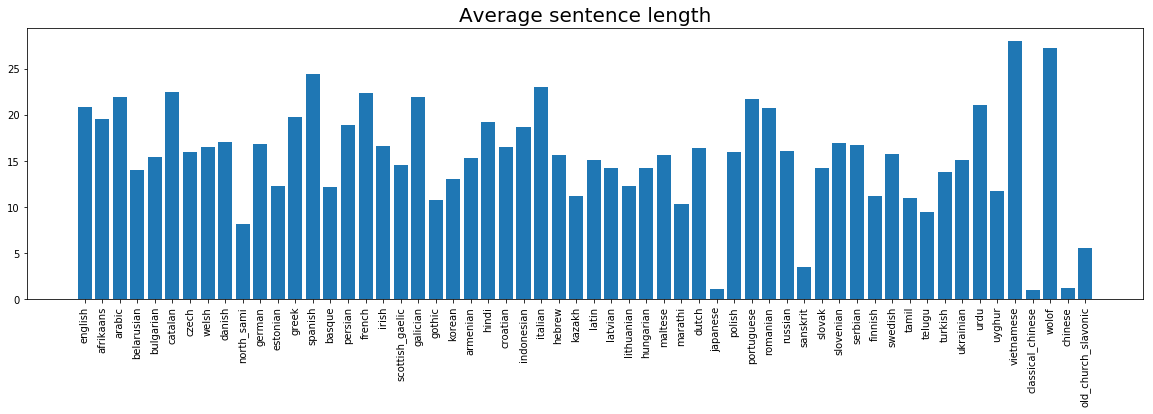

In [70]:
import matplotlib.pyplot as plt

languages_plot = list(average_sent_len.keys())
avg_sent_len = list(average_sent_len.values())

plt.bar(range(len(average_sent_len)), avg_sent_len, tick_label=languages_plot)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [20, 5]
plt.title('Average sentence length', fontsize=20)
plt.show()

Obviously, doesn't work with Japanese of Chinese.

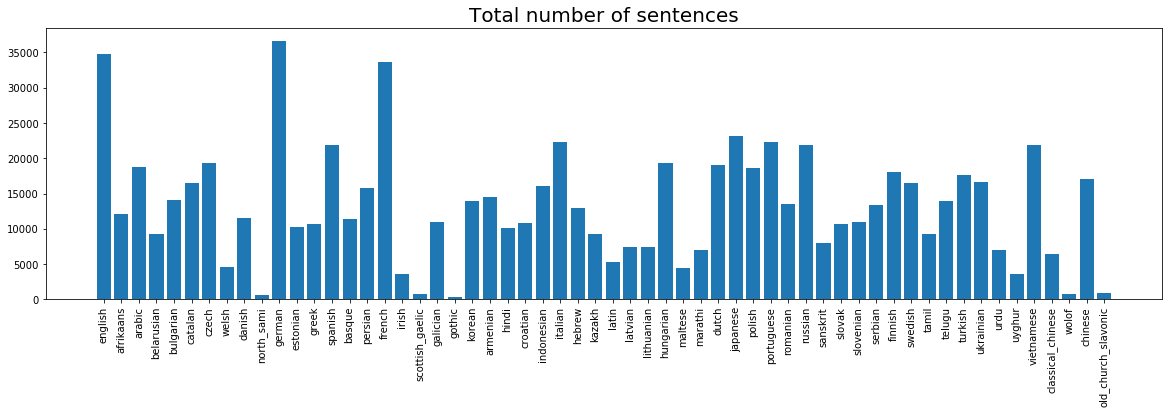

In [67]:
import matplotlib.pyplot as plt

languages_plot = list(total_number_sent.keys())
val_number_sent = list(total_number_sent.values())

plt.bar(range(len(total_number_sent)), val_number_sent, tick_label=languages_plot)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [20, 5]
plt.title('Total number of sentences', fontsize=20)
plt.show()

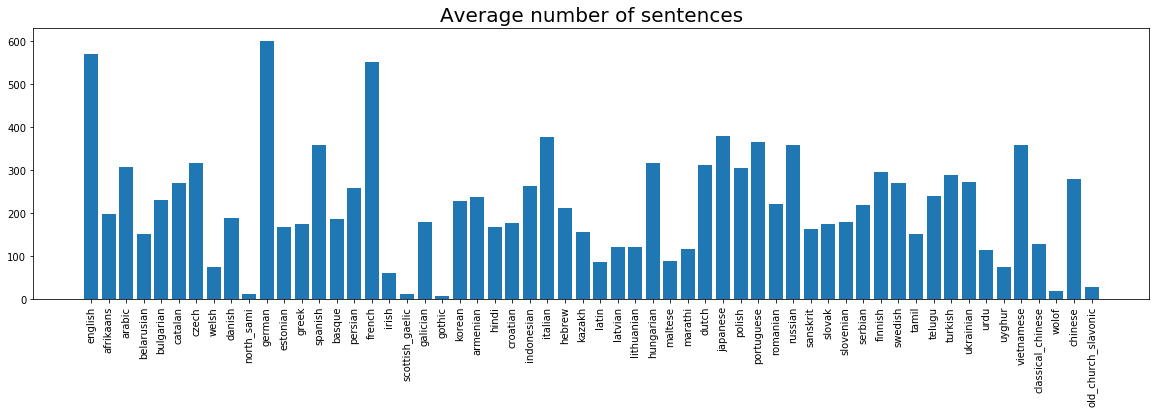

In [71]:
import matplotlib.pyplot as plt

languages_plot = list(average_num_sent.keys())
avg_number_sent = list(average_num_sent.values())

plt.bar(range(len(average_num_sent)), avg_number_sent, tick_label=languages_plot)
plt.xticks(rotation=90)
plt.rcParams['figure.figsize'] = [20, 5]
plt.title('Average number of sentences', fontsize=20)
plt.show()

In [72]:
{k: v for k, v in sorted(average_sent_len.items(), key=lambda item: item[1], reverse=True)}

{'vietnamese': 28.059631980274872,
 'wolof': 27.269282814614343,
 'spanish': 24.41189941831173,
 'italian': 22.99617822939616,
 'catalan': 22.47673434856176,
 'french': 22.406483271375464,
 'galician': 21.96680874217829,
 'arabic': 21.943380116334918,
 'portuguese': 21.740960604425258,
 'urdu': 21.06387539296942,
 'english': 20.824125521807975,
 'romanian': 20.703338000147372,
 'greek': 19.797558020318764,
 'afrikaans': 19.50554596992852,
 'hindi': 19.277982290319372,
 'persian': 18.9119101978691,
 'indonesian': 18.709938390690148,
 'danish': 17.095745602634086,
 'slovenian': 16.967668488160292,
 'german': 16.86699211825347,
 'serbian': 16.69940810669064,
 'irish': 16.654391707583198,
 'welsh': 16.551121656600518,
 'croatian': 16.501203258052573,
 'dutch': 16.39469389903669,
 'russian': 16.1373290793072,
 'czech': 15.996367033423292,
 'polish': 15.991646906660918,
 'swedish': 15.72818015824711,
 'maltese': 15.66299707930802,
 'hebrew': 15.621951219512194,
 'bulgarian': 15.3999292035398

In [74]:
{k: v for k, v in sorted(total_number_sent.items(), key=lambda item: item[1], reverse=True)}

{'german': 36667,
 'english': 34735,
 'french': 33625,
 'japanese': 23087,
 'italian': 22241,
 'portuguese': 22236,
 'russian': 21940,
 'vietnamese': 21901,
 'spanish': 21833,
 'hungarian': 19328,
 'czech': 19268,
 'dutch': 18997,
 'arabic': 18739,
 'polish': 18556,
 'finnish': 18099,
 'turkish': 17617,
 'chinese': 17040,
 'ukrainian': 16695,
 'catalan': 16548,
 'swedish': 16430,
 'indonesian': 16069,
 'persian': 15768,
 'armenian': 14567,
 'bulgarian': 14125,
 'korean': 13984,
 'telugu': 13977,
 'romanian': 13571,
 'serbian': 13347,
 'hebrew': 12956,
 'afrikaans': 12171,
 'danish': 11541,
 'basque': 11404,
 'galician': 11027,
 'slovenian': 10980,
 'croatian': 10804,
 'greek': 10729,
 'slovak': 10630,
 'estonian': 10301,
 'hindi': 10051,
 'belarusian': 9241,
 'kazakh': 9240,
 'tamil': 9225,
 'sanskrit': 7986,
 'lithuanian': 7455,
 'latvian': 7377,
 'marathi': 7060,
 'urdu': 6998,
 'classical_chinese': 6389,
 'latin': 5350,
 'welsh': 4636,
 'maltese': 4451,
 'irish': 3666,
 'uyghur': 36

In [75]:
{k: v for k, v in sorted(average_num_sent.items(), key=lambda item: item[1], reverse=True)}

{'german': 601.0983606557377,
 'english': 569.4262295081967,
 'french': 551.2295081967213,
 'japanese': 378.4754098360656,
 'italian': 376.96610169491527,
 'portuguese': 364.5245901639344,
 'russian': 359.672131147541,
 'vietnamese': 359.0327868852459,
 'spanish': 357.91803278688525,
 'hungarian': 316.8524590163934,
 'czech': 315.8688524590164,
 'dutch': 311.42622950819674,
 'arabic': 307.1967213114754,
 'polish': 304.1967213114754,
 'finnish': 296.7049180327869,
 'turkish': 288.8032786885246,
 'chinese': 279.344262295082,
 'ukrainian': 273.6885245901639,
 'catalan': 271.27868852459017,
 'swedish': 269.344262295082,
 'indonesian': 263.42622950819674,
 'persian': 258.4918032786885,
 'telugu': 240.98275862068965,
 'armenian': 238.80327868852459,
 'bulgarian': 231.55737704918033,
 'korean': 229.24590163934425,
 'romanian': 222.47540983606558,
 'serbian': 218.80327868852459,
 'hebrew': 212.39344262295083,
 'afrikaans': 199.52459016393442,
 'danish': 189.19672131147541,
 'basque': 186.95081

### Looking for square brackets

To see whether we should keep them or not. Update: we keep most of them!

In [32]:
def find_brac(lang):
    dictionary = {}
    with open('testing_scripts/square_brakets.txt', encoding="utf-8") as f:
        for line in f.readlines():
            if line.startswith(lang):
                res = re.findall('(\[.*?\])', line)
                for brac in res:
                    if brac in dictionary:
                        dictionary[brac] += 1
                    else:
                        dictionary[brac] = 1
    return dictionary

In [42]:
brackets_eng = find_brac('english')
brackets_esp = find_brac('spanish')
brackets_cat = find_brac('catalan')
brackets_fr = find_brac('french')
brackets_fin = find_brac('finnish')

In [36]:
{k: v for k, v in sorted(brackets_eng.items(), key=lambda item: item[1], reverse=True)}
# {k: v for k, v in sorted(brackets_esp.items(), key=lambda item: item[1], reverse=True)}
# {k: v for k, v in sorted(brackets_cat.items(), key=lambda item: item[1], reverse=True)}
# {k: v for k, v in sorted(brackets_fr.items(), key=lambda item: item[1], reverse=True)}
# {k: v for k, v in sorted(brackets_fin.items(), key=lambda item: item[1], reverse=True)}

{'[citation needed]': 157,
 '[update]': 124,
 '[page\xa0needed]': 23,
 '[better\xa0source\xa0needed]': 20,
 '[clarification needed]': 16,
 '[needs update]': 10,
 '[when?]': 9,
 '[unreliable source?]': 9,
 '[...]': 7,
 '[who?]': 7,
 '[…]': 7,
 '[failed verification]': 6,
 '[Ar]': 6,
 '[verification needed]': 5,
 '[Ne]': 5,
 '[Fe(CN)6]': 4,
 '[s]': 3,
 '[d]': 3,
 '[incomplete short citation]': 3,
 '[by whom?]': 3,
 '[which?]': 3,
 '[and]': 3,
 '[ʔiːˈɾɒːn]': 2,
 '[231]': 2,
 '[t]': 2,
 '[which]': 2,
 '[w]': 2,
 '[T]': 2,
 '[de]': 2,
 '[ing]': 2,
 '[excessive citations]': 2,
 '[neutrality is disputed]': 2,
 '[ref]': 2,
 '[ru]': 2,
 '[ɹ]': 2,
 '[Fe(H2O)6]': 2,
 '[Fe(NH3)6]': 2,
 '[AgF4]': 2,
 '[Ag(NH3)2]': 2,
 '[need quotation to verify]': 2,
 '[rɐˈsʲijə]': 1,
 '[roˈsia]': 1,
 '[iˈtaːlja]': 1,
 '[reˈpubblika itaˈljaːna]': 1,
 '[dubious  – discuss]': 1,
 '[circular reference]': 1,
 '[239]': 1,
 '[any further]': 1,
 '[p]': 1,
 '[I]': 1,
 '[vague]': 1,
 '[pʰ]': 1,
 '[p̚]': 1,
 '[ʔp]': 1,
 '[nɪ